# Cavité carré

La cavité carré produit des microlaser en 2 dimensions, elle est plus rapide a simuler. Mais il contient beaucoup d'information concernant la cavité pyramide.

## comment on va la simuler?

On va utiliser une bibliotheque portant le nom Meep pour facilter le travail de discretisation et du code avec FDTD. 

* Premierement, il faut construire le carré, soit un carré normal soit un carré tourné de 45 degree
* On peut toujours jouer avec la symmetrie pour écourcir le temps du calcul
* Le but, c'est de chercher les modes dans cavité (les fréquences résonantes) a partir d'une injection du champ de laser
* On peut trouver les modes avec TF, mais ce n'est pas practique parce que le temps qu'on observe est parfois en ps ou fs
* Une meilleure facon de le faire, c'est d'utiliser Haminv (qui extraire les infos de fréquences a partir de la forme ou l'atténuation du laser)
* Chercher le chemin optique
* Simuler le profil du mode



In [22]:
import meep as mp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Video

## First, need to define the cell (It's the space defined to give a plateform for simulation)

The cell size should be a little bigger than the square + the pml layer + the gap between them

In [32]:
# Initialized parameter 

b = 50        # base of the square
pml = 2.0     # the thickness of pml layer
pad = 10       # the padding between the cavity and the pml layer
n = 1.5       # refractive index the cavity (used resin)


In [33]:
sxy = b + pml + pad
cell_size = mp.Vector3(sxy, sxy, 0)

## Second, define the geometry of the cavity


La geometrie de la cavité est un carré

In [34]:
geometry = [mp.Block(mp.Vector3(b,b,mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(index=n))]

## Third, define the source

In [35]:
fcen = 0.15              # pulse center frequency
df = 0.1                 # pulse frequency width
src = mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Ez, mp.Vector3(0.1))

## Fourth, define the boundary condition

In [36]:
boudary_layer = mp.PML(pml)

## Finally, we can do the simulation

In [37]:
sim = mp.Simulation(cell_size= cell_size,
                    geometry= geometry,
                    sources=[src],
                    resolution=20,                    
                    boundary_layers=[boudary_layer])

-----------
Initializing structure...
time for choose_chunkdivision = 0.00030899 s
Working in 2D dimensions.
Computational cell is 62 x 62 x 0 with resolution 20
     block, center = (0,0,0)
          size (50,50,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 2.42861 s
-----------


FloatProgress(value=0.0, description='0% done ', max=200.0)

Meep progress: 12.8/200.0 = 6.4% done in 4.0s, 58.6s to go
on time step 512 (time=12.8), 0.00781571 s/step
Meep progress: 23.175/200.0 = 11.6% done in 8.0s, 61.1s to go
on time step 927 (time=23.175), 0.00964991 s/step
Meep progress: 33.125/200.0 = 16.6% done in 12.0s, 60.5s to go
on time step 1325 (time=33.125), 0.010055 s/step
Meep progress: 44.575/200.0 = 22.3% done in 16.0s, 55.9s to go
on time step 1783 (time=44.575), 0.0087407 s/step
Meep progress: 57.175000000000004/200.0 = 28.6% done in 20.0s, 50.0s to go
on time step 2287 (time=57.175), 0.00794799 s/step
Meep progress: 69.8/200.0 = 34.9% done in 24.0s, 44.8s to go
on time step 2792 (time=69.8), 0.00793531 s/step
Meep progress: 82.45/200.0 = 41.2% done in 28.0s, 40.0s to go
on time step 3298 (time=82.45), 0.00791643 s/step
Meep progress: 94.97500000000001/200.0 = 47.5% done in 32.0s, 35.4s to go
on time step 3799 (time=94.975), 0.00799209 s/step
Meep progress: 107.525/200.0 = 53.8% done in 36.0s, 31.0s to go
on time step 4301 (

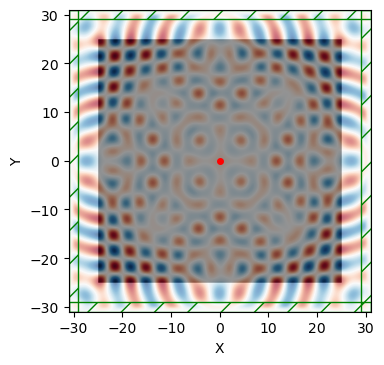

In [38]:
sim.run(until=200)

plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [19]:
# Chercher les fréquences de résonnance autour de f = 0.15

sim.run(mp.at_beginning(mp.output_epsilon),
        mp.after_sources(mp.Harminv(mp.Ez, mp.Vector3(0.1), fcen, df)),
        until_after_sources=300)

FloatProgress(value=200.0, description='0% done ', max=400.0, min=200.0)

creating output file "./eps-000200.00.h5"...
on time step 4000 (time=200), 0.1457 s/step
Meep progress: 130.20000000000005/400.0 = 32.6% done in 4.0s, 8.3s to go
on time step 6636 (time=331.8), 0.00151777 s/step
harminv1:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv1:, 0.12365406765598881, 0.0006744564631352807, -91.66942153772986, 9.9675255490888e-05, 1.628519248274675e-05-9.833589915678653e-05i, 0.00012496352677936372+0.0i
harminv1:, 0.127965675137189, -0.0003633676372202973, 176.08292818274268, 0.0003790321743228089, 0.00020539196437884973-0.00031855851917736173i, 3.5360740974837815e-06+0.0i
harminv1:, 0.14286976449612665, 0.00046181857402904366, -154.68170027213068, 0.0006694580499231429, 0.0006694328646186418-5.806924777920911e-06i, 2.657376576661508e-05+0.0i
harminv1:, 0.16213444033839564, -0.00013130035697423725, 617.4181246521988, 0.0010854723774847454, -0.0001164879531851787+0.0010792037986613618i, 5.496475604265053e-05+0.0i
harminv1:, 0.17106297663940948, 0.000

-----------
Initializing structure...
time for choose_chunkdivision = 0.00044179 s
Working in 2D dimensions.
Computational cell is 62 x 62 x 0 with resolution 20
     block, center = (0,0,0)
          size (50,50,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 2.54029 s
-----------


FloatProgress(value=0.0, description='0% done ', max=600.0)

Meep progress: 12.725000000000001/600.0 = 2.1% done in 4.0s, 184.9s to go
on time step 510 (time=12.75), 0.00785466 s/step
Meep progress: 24.1/600.0 = 4.0% done in 8.0s, 191.4s to go
on time step 965 (time=24.125), 0.00880479 s/step
Meep progress: 35.300000000000004/600.0 = 5.9% done in 12.0s, 192.2s to go
on time step 1413 (time=35.325), 0.00893337 s/step
Meep progress: 45.775000000000006/600.0 = 7.6% done in 16.0s, 194.0s to go
on time step 1832 (time=45.8), 0.00956589 s/step
Meep progress: 56.75/600.0 = 9.5% done in 20.0s, 191.7s to go
on time step 2271 (time=56.775), 0.00911674 s/step
Meep progress: 69.375/600.0 = 11.6% done in 24.0s, 183.8s to go
on time step 2776 (time=69.4), 0.00792909 s/step
Meep progress: 82.025/600.0 = 13.7% done in 28.0s, 177.0s to go
on time step 3282 (time=82.05), 0.00790636 s/step
Meep progress: 94.65/600.0 = 15.8% done in 32.0s, 171.1s to go
on time step 3787 (time=94.675), 0.00793511 s/step
Meep progress: 107.125/600.0 = 17.9% done in 36.0s, 165.8s to g

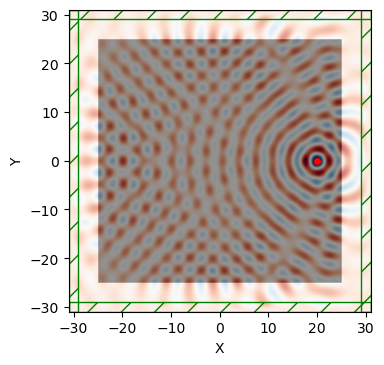

In [40]:
# Pour f = 0.196

sim.reset_meep()
fcen=0.196
df = 0.001
sim.sources = [mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Ez, mp.Vector3(20))]

# Start the simulation and get into steady state
sim.run(until=600) 

plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez)
plt.show()
